In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')

## Preliminary Analysis

In [5]:
diabetes_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [11]:
diabetes_data.shape

(520, 17)

In [13]:
diabetes_data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [16]:
diabetes_data.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [17]:
diabetes_data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

###### Age: Numerical value representing the age of the patient.

##### Gender: Male or Female.

###### Polyuria to Obesity: These are symptoms or conditions often associated with diabetes. Their values are categorical: 'Yes' or 'No'.

###### class: This is our target variable for classification. It indicates whether the patient has diabetes ('Positive') or not ('Negative').

In [18]:
diabetes_data.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


## EDA

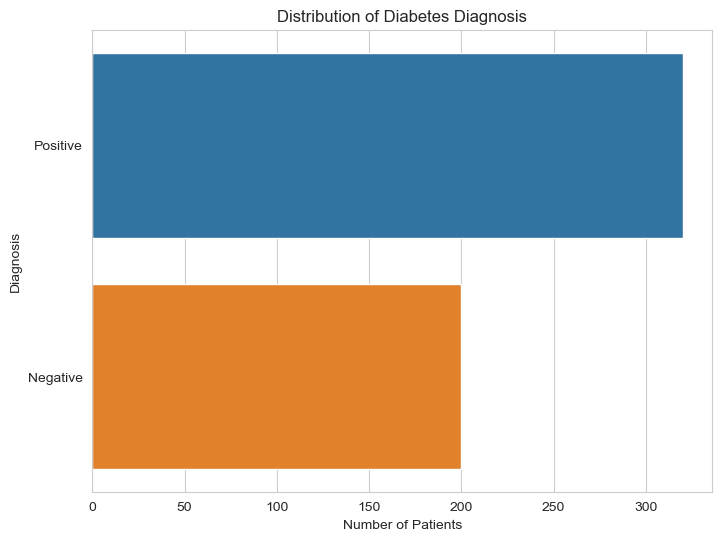

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))

sns.countplot(y='class', data=diabetes_data)
plt.title('Distribution of Diabetes Diagnosis')
plt.xlabel('Number of Patients')
plt.ylabel('Diagnosis')
plt.show()

### The plot shows that there are more positive counts than negative in the Target variable

In [22]:
# This suggests an imbalance, which we need to be aware of when modeling,
#as it can affect the performance and interpretation of the classifier.

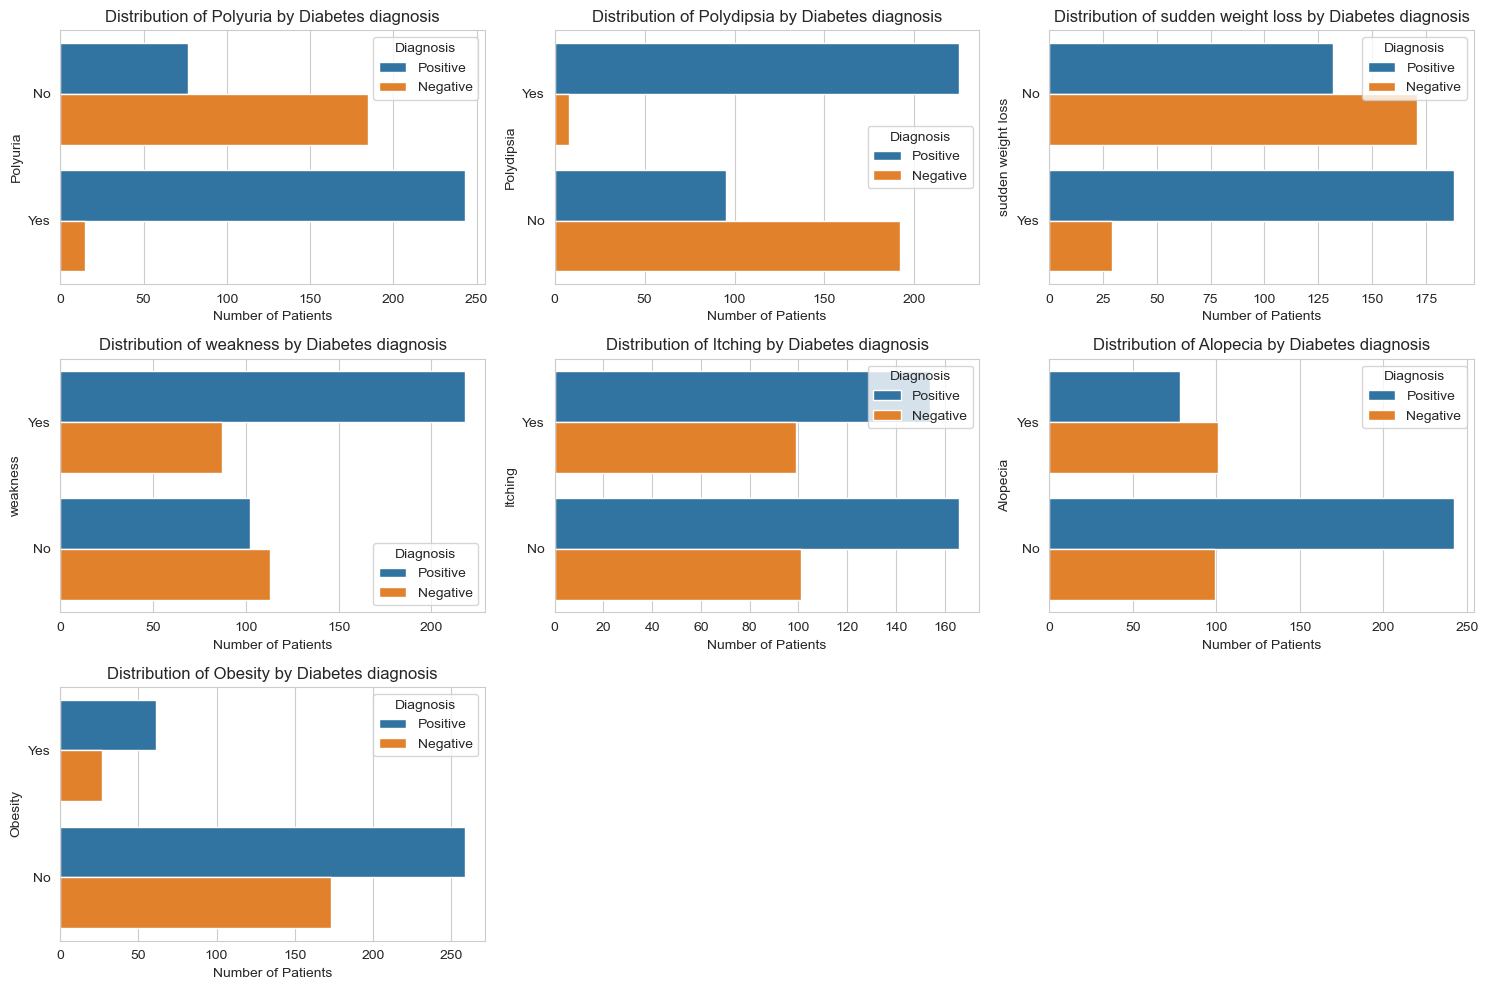

In [23]:
# Selecting a subset of features for visualization
features_to_visualise = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Itching', 'Alopecia', 'Obesity']

# Plotting the distribution of these features against the 'class' label
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_visualise, 1):
    plt.subplot(3,3,i)
    
    sns.countplot(y=feature, hue='class', data=diabetes_data)
    plt.title(f"Distribution of {feature} by Diabetes diagnosis")
    plt.ylabel(feature)
    plt.xlabel('Number of Patients')
    plt.legend(title='Diagnosis')

plt.tight_layout()
plt.show()

### Eg defenition to understand the plots
The first pair of bars shows the count of patients without the 'Polyuria' symptom, divided by their diabetes diagnosis (either 'Positive' or 'Negative').

The second pair of bars shows the count of patients with the 'Polyuria' symptom, again divided by their diabetes diagnosis.

#### Noticable features

Polyuria & Polydipsia: A significant number of patients with these symptoms have a positive diabetes diagnosis.

Sudden Weight Loss: This symptom appears more frequently in patients with a positive diagnosis.

Weakness: While a large number of patients with this symptom have diabetes, there's also a significant number without.

Itching: This symptom seems to be quite common among both groups, but slightly more prevalent in patients without diabetes.

Alopecia: A noticeable number of patients without diabetes exhibit this symptom.

Obesity: Obesity seems more prevalent in patients without diabetes, which is a bit counterintuitive given its known association with Type 2 diabetes.

## Data Preprocessing

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [29]:
label_encoder = {}

for column in diabetes_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    diabetes_data[column] = le.fit_transform(diabetes_data[column])
    label_encoder[column] = le
    
# Splitting the data into training and test sets
X = diabetes_data.drop('class', axis=1)
y = diabetes_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((416, 16), (104, 16), (416,), (104,))

## Data Modelling for Support Vector Classification

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [35]:
#initializing the model

In [41]:
svc = SVC(kernel='linear', C=1, random_state=42 )
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

# Calculate accuracy_score precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"The accuracy is {accuracy}\n")
print(f"The precision_score is {precision}\n")
print(f"The recall_score is {recall}\n")
print(f"The f1_score is {f1}")

The accuracy is 0.8942307692307693

The precision_score is 0.9285714285714286

The recall_score is 0.9154929577464789

The f1_score is 0.921985815602837


The Support Vector Classifier (SVC) achieved an accuracy of approximately 
89.42% on the test data. This indicates that the model is quite effective in classifying patients based on the given symptoms and features

### confusion matrix

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[28,  5],
       [ 6, 65]], dtype=int64)

Top-left: True Negatives (28) - Patients correctly identified as not having diabetes.

Top-right: False Positives (5) - Patients incorrectly identified as having diabetes.

Bottom-left: False Negatives (6) - Patients incorrectly identified as not having diabetes.

Bottom-right: True Positives (65) - Patients correctly identified as having diabetes.

## Generating a risk score to act as independent feature to train a SV-Regression model

Generate a Synthetic Risk Score: We'll create a score that quantitatively represents the risk of diabetes for each patient. This can be done by assigning scores based on the number of symptoms they exhibit.

In [44]:
diabetes_data['risk_score'] = diabetes_data.drop(['Gender','class'], axis=1).sum(axis=1)

# Display the first few rows of the dataset with the new 'risk_score' column
diabetes_data[['risk_score']].head()

,risk_score
0,47
1,62
2,48
3,51
4,73


In [45]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

# Splitting the data into training and test sets (using the original features and the new 'risk_score' as target)
X_svr = diabetes_data.drop('risk_score', axis=1)
y_svr = diabetes_data['risk_score']

X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X_svr, y_svr, test_size=0.2, random_state=42)

# Train the SVR model
svr = SVR(kernel='linear', C=1)
svr.fit(X_train_svr, y_train_svr)

# Predict on the test set
y_pred_svr = svr.predict(X_test_svr)

# Evaluate the model's performance
mae = mean_absolute_error(y_test_svr, y_pred_svr)
r2 = r2_score(y_test_svr, y_pred_svr)

mae, r2


(0.05195666875038086, 0.9999789458917445)

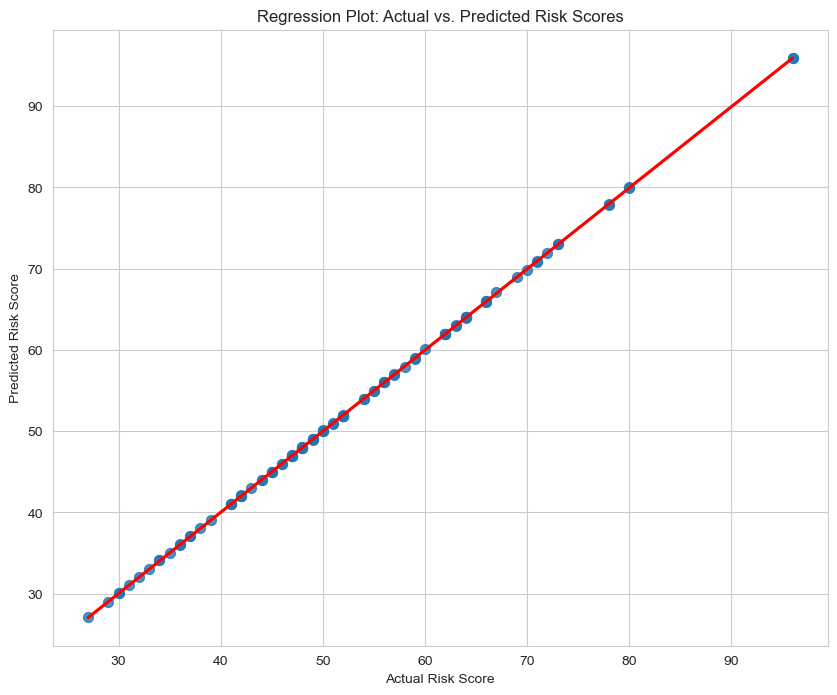

In [46]:
# Regression plot to visualize the relationship between actual and predicted risk scores
plt.figure(figsize=(10, 8))
sns.regplot(x=y_test_svr, y=y_pred_svr, scatter_kws={'s': 50}, line_kws={'color': 'red'}, ci=None)
plt.xlabel('Actual Risk Score')
plt.ylabel('Predicted Risk Score')
plt.title('Regression Plot: Actual vs. Predicted Risk Scores')
plt.grid(True)
plt.show()

Synthetic Target Variable: The "risk score" was constructed based on the dataset's features. It's inherently tied to the input data, which might make it easier for the model to predict.

High R-squared Value: An R2 value very close to 1 can be indicative of a perfect fit, but in some cases, it might also hint at overfitting. Especially when working with synthetic or engineered features.